### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

### Dataset source URL

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

### Attribute Information
|||
|-|-|
|mpg|continuous|
|cylinders|multi-valued discrete|
|displacement|continuous|
|horsepower|continuous|
|weight|continuous|
|acceleration|continuous|
|model year|multi-valued discrete|
|origin|multi-valued discrete|
|car name|string (unique for each instance)|

In [3]:
column_names = [
    'MPG',
    'Cylinders',
    'Displacement',
    'Horsepower',
    'Weight',
    'Acceleration',
    'Model Year',
    'Origin'
]

In [4]:
raw_dataset = pd.read_csv(
    url,
    names=column_names,
    na_values='?',
    comment='\t',
    sep=' ',
    skipinitialspace=True
)

In [5]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
# Checking if there are any NaN
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset[dataset.Horsepower.isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [8]:
# Dropping rows with NaN
dataset.dropna(inplace=True)

In [9]:
dataset[dataset.Horsepower.isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin


In [10]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
dataset.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [12]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [13]:
print(
    sorted(dataset.Cylinders.unique()),
    sorted(dataset['Model Year'].unique()),
    sorted(dataset.Origin.unique()),
    sep='\n'
)

[3, 4, 5, 6, 8]
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[1, 2, 3]


In [14]:
# pd.get_dummies It converts categorical data into dummy or indicator variables.
# This is very similar to One-Hot-Encoding
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [15]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [16]:
dataset.rename({'1': 'USA', '2': 'Europe', '3': 'Japan'}, axis='columns', inplace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### Observarions
- Cylinders is a categorical column
- Gives an hint to check if Cylinders is categorial on every other feature

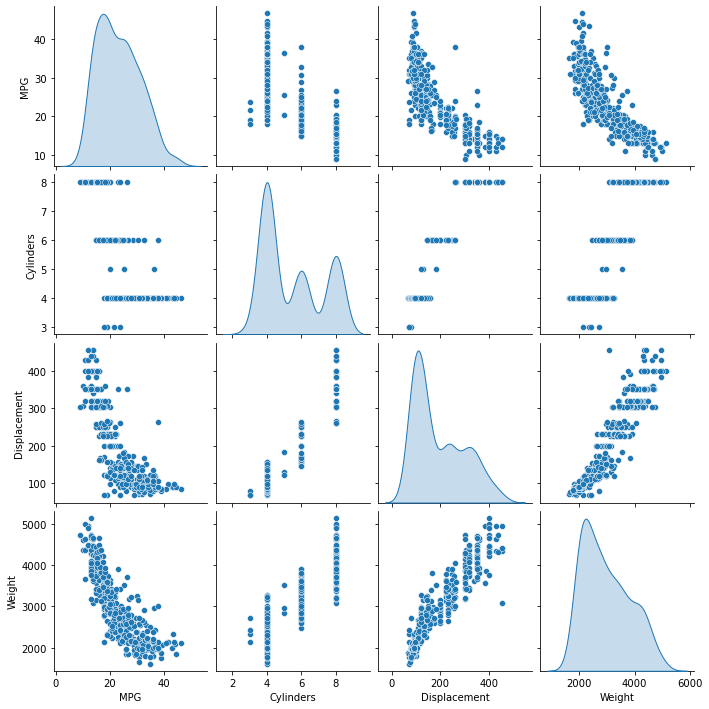

In [17]:
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

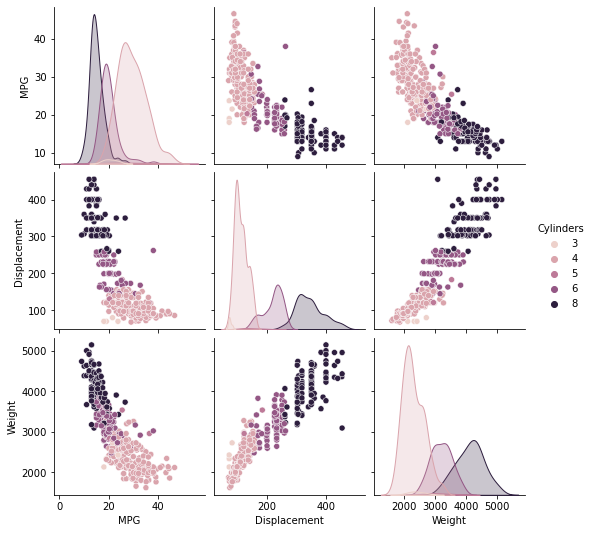

In [18]:
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde', hue='Cylinders')

In [19]:
X = dataset.loc[:, dataset.columns != 'MPG']
y = dataset.loc[:, dataset.columns == 'MPG']

In [20]:
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [21]:
y.head()

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [23]:
print(
    f'''
    X_train = {len(X_train)}, X_test = {len(y_train)},
    y_train = {len(X_test)}, y_test = {len(y_test)}
    '''
)


    X_train = 235, X_test = 235,
    y_train = 157, y_test = 157
    


In [24]:
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
136,8,302.0,140.0,4141.0,14.0,74,1,0,0
208,8,318.0,150.0,3940.0,13.2,76,1,0,0
392,4,151.0,90.0,2950.0,17.3,82,1,0,0
256,6,225.0,100.0,3430.0,17.2,78,1,0,0
166,8,302.0,129.0,3169.0,12.0,75,1,0,0


In [25]:
X_test.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
327,5,121.0,67.0,2950.0,19.9,80,0,1,0
184,4,140.0,92.0,2572.0,14.9,76,1,0,0
117,4,68.0,49.0,1867.0,19.5,73,0,1,0
146,4,90.0,75.0,2125.0,14.5,74,1,0,0
260,6,225.0,110.0,3620.0,18.7,78,1,0,0


In [26]:
y_train.head()

,MPG
136,16.0
208,13.0
392,27.0
256,20.5
166,13.0


In [27]:
y_test.head()

,MPG
327,36.4
184,25.0
117,29.0
146,28.0
260,18.6


In [28]:
X_train.reset_index(drop=True, inplace=True)
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,302.0,140.0,4141.0,14.0,74,1,0,0
1,8,318.0,150.0,3940.0,13.2,76,1,0,0
2,4,151.0,90.0,2950.0,17.3,82,1,0,0
3,6,225.0,100.0,3430.0,17.2,78,1,0,0
4,8,302.0,129.0,3169.0,12.0,75,1,0,0


In [29]:
X_test.reset_index(drop=True, inplace=True)
X_test.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,5,121.0,67.0,2950.0,19.9,80,0,1,0
1,4,140.0,92.0,2572.0,14.9,76,1,0,0
2,4,68.0,49.0,1867.0,19.5,73,0,1,0
3,4,90.0,75.0,2125.0,14.5,74,1,0,0
4,6,225.0,110.0,3620.0,18.7,78,1,0,0


In [30]:
y_train.reset_index(drop=True, inplace=True)
y_train.head()

,MPG
0,16.0
1,13.0
2,27.0
3,20.5
4,13.0


In [31]:
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,MPG
0,36.4
1,25.0
2,29.0
3,28.0
4,18.6


In [32]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cylinders,235.0,5.502128,1.700614,3.0,4.00,4.0,8.00,8.0
Displacement,235.0,196.840426,102.622623,70.0,109.00,151.0,302.00,455.0
Horsepower,235.0,104.787234,37.042212,46.0,78.00,95.0,129.00,225.0
Weight,235.0,3021.893617,839.357967,1649.0,2271.50,2868.0,3694.50,5140.0
Acceleration,235.0,15.658298,2.784121,8.5,13.95,15.5,17.15,24.8
Model Year,235.0,75.889362,3.666156,70.0,73.00,76.0,79.00,82.0
USA,235.0,0.638298,0.481519,0.0,0.00,1.0,1.00,1.0
Europe,235.0,0.170213,0.376622,0.0,0.00,0.0,0.00,1.0
Japan,235.0,0.191489,0.394313,0.0,0.00,0.0,0.00,1.0


### Normalization

In [33]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [34]:
normalizer.adapt(np.array(X_train))

In [35]:
print(normalizer.mean)

tf.Tensor(
[[   5.502  196.84   104.787 3021.894   15.658   75.889    0.638    0.17
     0.191]], shape=(1, 9), dtype=float32)


In [36]:
X_train.mean()

Cylinders          5.502128
Displacement     196.840426
Horsepower       104.787234
Weight          3021.893617
Acceleration      15.658298
Model Year        75.889362
USA                0.638298
Europe             0.170213
Japan              0.191489
dtype: float64

In [38]:
horsepower_normalizer = tf.keras.layers.Normalization(input_shape=[1, ], axis=None)

In [39]:
horsepower_normalizer.adapt(np.array(X_train.Horsepower))

### Keras Sequential model

In [40]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [41]:
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [42]:
horsepower_model.predict(np.array(X_train.Horsepower)[:10])

array([[ 0.218],
       [ 0.28 ],
       [-0.091],
       [-0.03 ],
       [ 0.15 ],
       [ 0.298],
       [ 0.218],
       [-0.048],
       [ 0.28 ],
       [-0.351]], dtype=float32)

In [43]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [44]:
%%time
history = horsepower_model.fit(
    X_train.Horsepower,
    y_train,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

Wall time: 2.36 s


In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [46]:
hist.head()

,loss,val_loss,epoch
0,23.044012,21.613258,0
1,22.433247,21.029148,1
2,21.826286,20.433857,2
3,21.225321,19.846388,3
4,20.625771,19.261246,4


In [47]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [48]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    X_test.Horsepower,
    y_test,
    verbose=0
)

In [49]:
test_results

{'horsepower_model': 4.067505836486816}

In [50]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [51]:
def plot_horsepower(x, y):
    plt.scatter(X_train.Horsepower, y_train, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

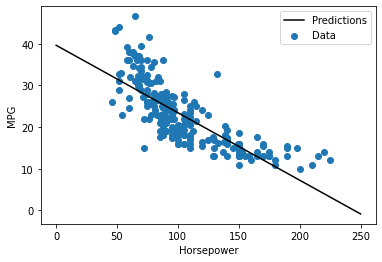

In [52]:
plot_horsepower(x, y)

### Linear regression with multiple inputs

In [53]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [54]:
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [55]:
linear_model.predict(X_train[:10])

array([[-0.484],
       [-0.546],
       [-1.191],
       [-1.109],
       [-0.243],
       [ 0.057],
       [-0.369],
       [ 1.112],
       [ 1.368],
       [-0.074]], dtype=float32)

In [56]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.656],
       [ 0.593],
       [-0.422],
       [ 0.265],
       [-0.712],
       [-0.333],
       [-0.287],
       [ 0.53 ],
       [ 0.451]], dtype=float32)>

In [57]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [58]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

Wall time: 2.3 s


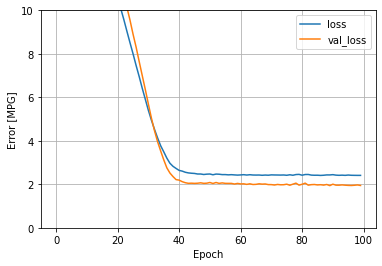

In [59]:
plot_loss(history)

In [60]:
test_results['linear_model'] = linear_model.evaluate(
    X_test, 
    y_test, 
    verbose=0
)

# Regression with a deep neural network (DNN)

In [61]:
model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [63]:
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [64]:
%%time
history = model.fit(
    X_train.Horsepower,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

Wall time: 2.37 s


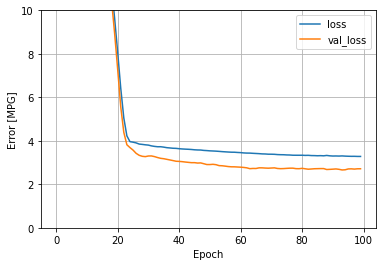

In [65]:
plot_loss(history)

In [66]:
x = tf.linspace(0.0, 250, 251)
y = model.predict(x)

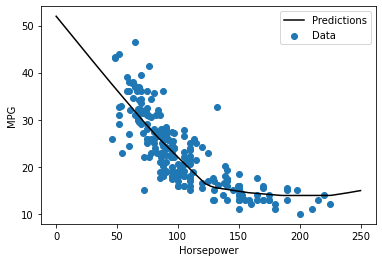

In [67]:
plot_horsepower(x, y)

### Regression using a DNN and multiple inputs

In [68]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [69]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [71]:
%%time
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

Wall time: 2.63 s


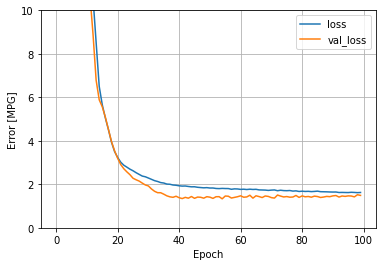

In [72]:
plot_loss(history)

In [73]:
test_results['model'] = model.evaluate(X_test, y_test, verbose=0)

In [74]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,4.067506
linear_model,2.714275
model,2.240574


In [75]:
test_predictions = model.predict(X_test).flatten()

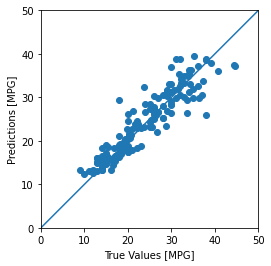

In [76]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [77]:
error = test_predictions - np.array(y_test).reshape(-1)

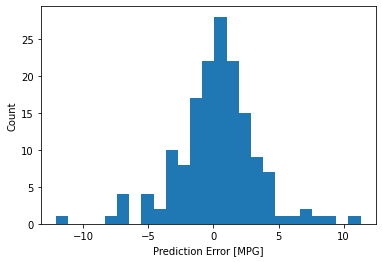

In [78]:
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [79]:
model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [80]:
reloaded = tf.keras.models.load_model('dnn_model')

In [82]:
test_results['reloaded'] = reloaded.evaluate(X_test, y_test, verbose=0)

In [83]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,4.067506
linear_model,2.714275
model,2.240574
reloaded,2.240574
